Algoritmo de clasificación **histórico-temático.** Se elaboró como un proyecto de tesis para la licenciatura en Biblioteconomía, de la Escuela Nacional de Biblioteconomía y Archivonomía del IPN. El objetivo es asignarle términos temáticos a los documentos del **Atlas Histórico de la Ciencia Mexicana**, tomando como base el  Catálogo de Publicaciones Científica de la RS, del siglo XIX.

Se estructuro tomando como base:

https://towardsdatascience.com/multi-label-text-classification-using-bert-and-tensorflow-d2e88d8f488d

https://pianalytix.com/multi-label-text-classification/





**BERT y TensorfFlow**

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importar datos de entrenamiento**

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Clasificación histórica-temática/BERT and TensorFlow/Datos de entrenamiento/DatosEntrenamientoBERT.csv', encoding='latin8') 

In [ ]:
df.head()

,TITULO,General
0,ALGO SOBRE TRATAMIENTO QUIRURGICO DE LOS ABSCE...,Anatomía Humana
1,ALGUNAS CONSIDERACIONES ACERCA DE LOS ABSCESOS...,Anatomía Humana
2,ALGO SOBRE EL TRATAMIENTO QUIRURGICO DE LOS DE...,Anatomía Humana
3,ABDOMEN INFANTIL,Anatomía Humana
4,BREVES COMENTARIOS SOBRE EL TRATAMIENTO QUIRUR...,Anatomía Humana


**Visualizar las áreas temáticas generales**

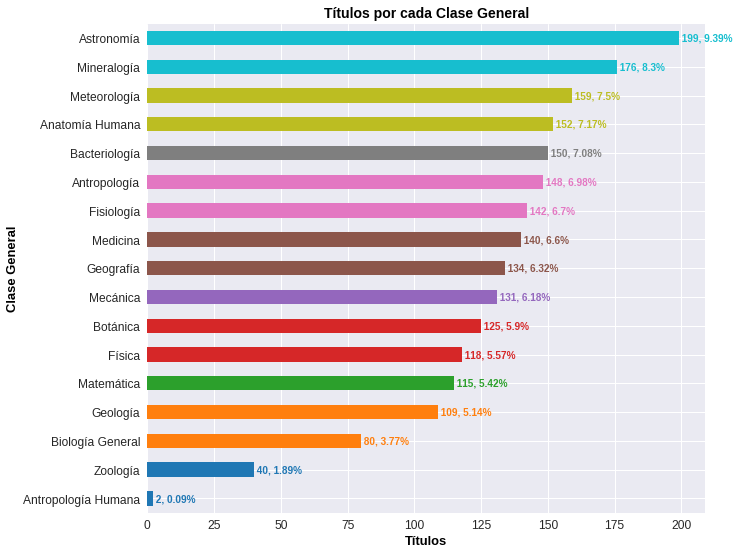

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

fuente1={'family': 'sans-serif', 'weight': 'bold', 'color':'black', 'size': 13}
fuente={'family': 'sans-serif', 'color':'black','weight': 'bold', 'size': 14}


num_classes = len(df["General"].value_counts())

colors = plt.cm.tab10(np.linspace(0, 1, num_classes))
iter_color = iter(colors)

df['General'].value_counts(ascending=True).plot(kind='barh', color=colors, figsize=(10,9))

plt.title('Títulos por cada Clase General', fontdict=fuente)
plt.xlabel('Títulos', fontdict=fuente1)
plt.ylabel('Clase General', fontdict=fuente1)


plt.xticks(fontsize=12, family='sans-serif')
plt.yticks(fontsize=12, family='sans-serif')



for i, v in enumerate(df['General'].value_counts(ascending=True)):
  c = next(iter_color)
  plt.text(v, i,
           " "+str(v)+", "+str(round(v*100/df.shape[0],2))+"%", 
           color=c, 
           va='center', 
           fontweight='bold')

In [ ]:
df['General'].value_counts()

Astronomía             199
Mineralogía            176
Meteorología           159
Anatomía Humana        152
Bacteriología          150
Antropología           148
Fisiología             142
Medicina               140
Geografía              134
Mecánica               131
Botánica               125
Física                 118
Matemática             115
Geología               109
Biología General        80
Zoología                40
Antropología Humana      2
Name: General, dtype: int64

In [ ]:
df['Labels'] = df['General'].map({'Astronomía': 0,
                                            'Mineralogía': 1,
                                            'Meteorología': 2,
                                            'Anatomía Humana': 3,
                                            'Bacteriología': 4,
                                            'Antropología': 5,
                                            'Fisiología': 6,
                                            'Medicina': 7,
                                            'Geografía': 8,
                                            'Mecánica': 9,
                                            'Botánica': 10,
                                            'Física': 11,
                                            'Matemática': 12,
                                            'Geología': 13,
                                            'Biología General': 14,
                                            'Zoología': 15,
                                            'Antropología Humana': 16})


df = df.drop(["General"], axis=1)

df.head()

,TITULO,Labels
0,ALGO SOBRE TRATAMIENTO QUIRURGICO DE LOS ABSCE...,3
1,ALGUNAS CONSIDERACIONES ACERCA DE LOS ABSCESOS...,3
2,ALGO SOBRE EL TRATAMIENTO QUIRURGICO DE LOS DE...,3
3,ABDOMEN INFANTIL,3
4,BREVES COMENTARIOS SOBRE EL TRATAMIENTO QUIRUR...,3


**División de datos de entrenamiento, conjunto y prueba**

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

y = tf.keras.utils.to_categorical(df["Labels"].values, num_classes=num_classes)

x_train, x_test, y_train, y_test = train_test_split(df['TITULO'], y, test_size=0.25)

In [ ]:
!pip install tensorflow_text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 87.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 92.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 117.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 KB 50.2 MB/s eta 0:00:00
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully uninstalled flatbuffers-1.12
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully 

**Vectorizar los títulos asociados con las clases temáticas**<br>
**Importar BERT con TensorfFlow Hub**


In [ ]:
# para usuarios de Colab: !pip install tensorflow_text
import tensorflow_hub as hub

import tensorflow_text as text

preprocessor = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder-cmlm/multilingual-preprocess/2")
encoder = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder-cmlm/multilingual-base/1")


def get_embeddings(sentences):
 
  preprocessed_text = preprocessor(sentences)
  return encoder(preprocessed_text)['pooled_output']


get_embeddings([
    "Mineralogía"]
)

<tf.Tensor: shape=(1, 768), dtype=float32, numpy=
array([[ 8.94754827e-02, -3.58753860e-01,  7.33527362e-01,
         3.72405425e-02,  7.36013055e-01, -3.49129885e-01,
        -4.29396611e-03, -9.32501197e-01, -1.11510217e-01,
        -3.81946713e-01, -7.52652407e-01, -2.95687258e-01,
        -9.15944502e-02, -1.80154830e-01, -9.19100165e-01,
        -1.68856072e+00, -6.62477612e-01,  1.92062646e-01,
         5.09559453e-01, -7.12067366e-01, -1.12269533e+00,
         1.10483065e-01, -2.17892811e-01, -3.48467007e-02,
        -1.26278901e+00, -1.20931125e+00, -8.65730882e-01,
         3.58543515e-01, -7.37488270e-01, -4.38033283e-01,
        -5.60963333e-01, -4.60512340e-01, -8.92719850e-02,
        -6.62121177e-01, -2.21156046e-01,  3.66499633e-01,
         4.48862985e-02,  5.36931992e-01,  1.63126260e-01,
         1.98081449e-01,  4.34543431e-01, -5.80194592e-01,
        -1.18464112e+00,  6.69735074e-01,  5.03065407e-01,
         1.06904006e+00,  3.33989859e-01,  3.14548880e-01,
      

In [ ]:
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity


def plot_similarity(features, labels):
  
  cos_sim = cosine_similarity(features)
  fig = plt.figure(figsize=(15,15))
  sns.set(font_scale=1.2)
  cbar_kws=dict(use_gridspec=False, location="left")
  g = sns.heatmap(
      cos_sim, xticklabels=labels, yticklabels=labels,
      vmin=0, vmax=1, annot=True, cmap="Blues", 
      cbar_kws=cbar_kws)
  g.tick_params(labelright=True, labelleft=False)
  g.set_yticklabels(labels, rotation=0)
  g.set_title("Similitud semántica")

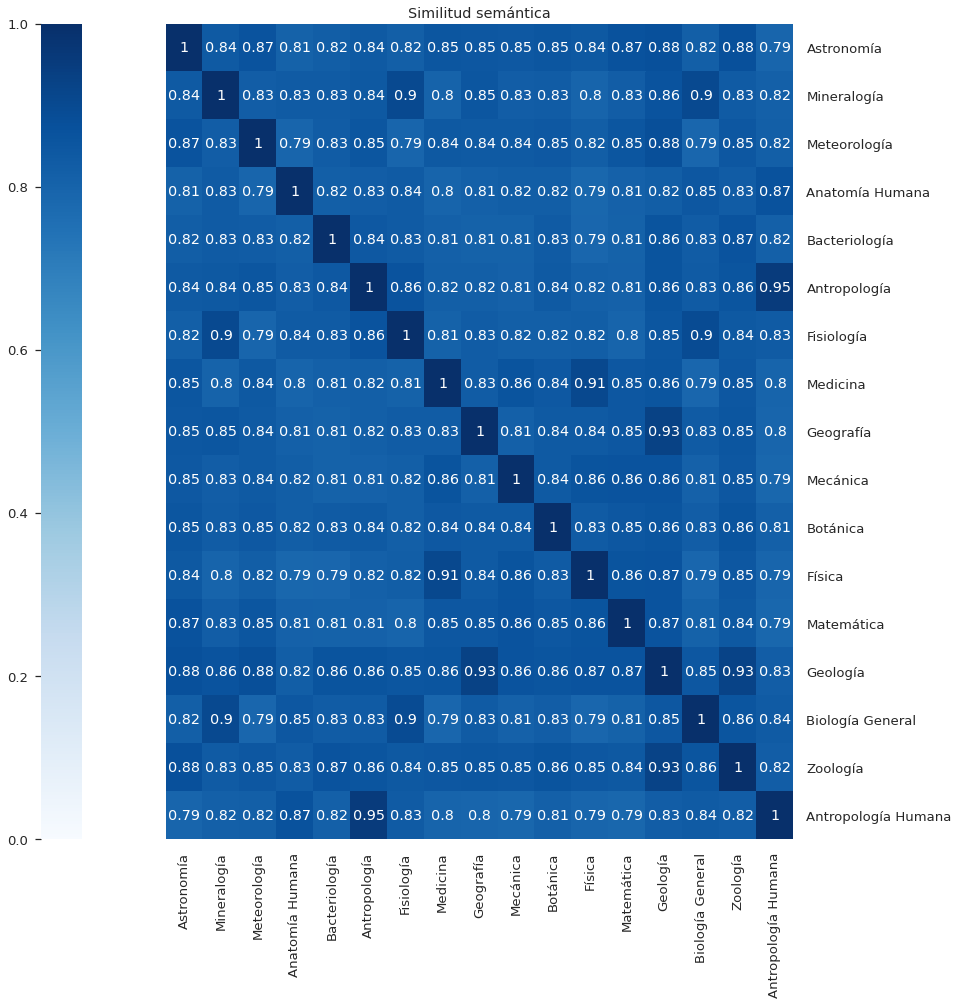

In [ ]:
reviews = ["Astronomía",
           "Mineralogía",
           "Meteorología",
           "Anatomía Humana",
           "Bacteriología",
           "Antropología",
           "Fisiología",
           "Medicina",
           "Geografía",
           "Mecánica",
           "Botánica",
           "Física",
           "Matemática",
           "Geología",
           "Biología General",
           "Zoología",
           "Antropología Humana"]
           
plot_similarity(get_embeddings(reviews), reviews)

In [ ]:
from keras import backend as K

def balanced_recall(y_true, y_pred):
    
    recall_by_class = 0
    
    for i in range(y_pred.shape[1]):
        y_pred_class = y_pred[:, i]
        y_true_class = y_true[:, i]
        true_positives = K.sum(K.round(K.clip(y_true_class * y_pred_class, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true_class, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        recall_by_class = recall_by_class + recall
    return recall_by_class / y_pred.shape[1]

def balanced_precision(y_true, y_pred):
    
    precision_by_class = 0
  
    for i in range(y_pred.shape[1]):
        y_pred_class = y_pred[:, i]
        y_true_class = y_true[:, i]
        true_positives = K.sum(K.round(K.clip(y_true_class * y_pred_class, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred_class, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        precision_by_class = precision_by_class + precision
   
    return precision_by_class / y_pred.shape[1]

def balanced_f1_score(y_true, y_pred):
   
    precision = balanced_precision(y_true, y_pred)
    recall = balanced_recall(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

In [ ]:
i = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
x = preprocessor(i)
x = encoder(x)
x = tf.keras.layers.Dropout(0.2, name="dropout")(x['pooled_output'])
x = tf.keras.layers.Dense(num_classes, activation='softmax', name="output")(x)

model = tf.keras.Model(i, x)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


**Entrenar el algoritmo**

In [ ]:
n_epochs = 20

METRICS = [
      tf.keras.metrics.CategoricalAccuracy(name="accuracy"),
      balanced_recall,
      balanced_precision,
      balanced_f1_score
]

earlystop_callback = tf.keras.callbacks.EarlyStopping(monitor = "val_loss", 
                                                      patience = 3,
                                                      restore_best_weights = True)

model.compile(optimizer = "adam",
              loss = "categorical_crossentropy",
              metrics = METRICS)

model_fit = model.fit(x_train, 
                      y_train, 
                      epochs = n_epochs,
                      validation_data = (x_test, y_test),
                      callbacks = [earlystop_callback])

Epoch 1/20
50/50 [==============================] - 45s 557ms/step - loss: 2.6929 - accuracy: 0.1365 - balanced_recall: 0.0000e+00 - balanced_precision: 0.0000e+00 - balanced_f1_score: 0.0000e+00 - val_loss: 2.5119 - val_accuracy: 0.2019 - val_balanced_recall: 0.0000e+00 - val_balanced_precision: 0.0000e+00 - val_balanced_f1_score: 0.0000e+00
Epoch 2/20
50/50 [==============================] - 25s 513ms/step - loss: 2.3422 - accuracy: 0.2799 - balanced_recall: 0.0054 - balanced_precision: 0.0106 - balanced_f1_score: 0.0066 - val_loss: 2.3199 - val_accuracy: 0.2981 - val_balanced_recall: 0.0043 - val_balanced_precision: 0.0138 - val_balanced_f1_score: 0.0064
Epoch 3/20
50/50 [==============================] - 22s 436ms/step - loss: 2.1189 - accuracy: 0.3667 - balanced_recall: 0.0124 - balanced_precision: 0.0335 - balanced_f1_score: 0.0175 - val_loss: 2.1938 - val_accuracy: 0.3491 - val_balanced_recall: 0.0228 - val_balanced_precision: 0.0369 - val_balanced_f1_score: 0.0276
Epoch 4/20
50

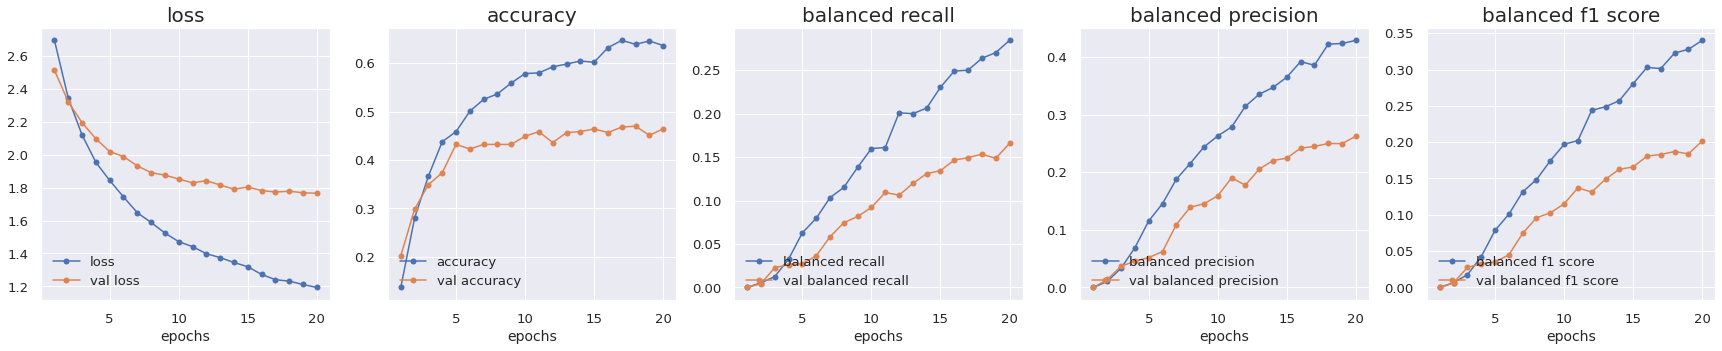

In [ ]:
x = list(range(1, n_epochs+1))
metric_list = list(model_fit.history.keys())
num_metrics = int(len(metric_list)/2)

fig, ax = plt.subplots(nrows=1, ncols=num_metrics, figsize=(30, 5))

for i in range(0, num_metrics):
  ax[i].plot(x, model_fit.history[metric_list[i]], marker="o", label=metric_list[i].replace("_", " "))
  ax[i].plot(x, model_fit.history[metric_list[i+num_metrics]], marker="o", label=metric_list[i+num_metrics].replace("_", " "))
  ax[i].set_xlabel("epochs",fontsize=14)
  ax[i].set_title(metric_list[i].replace("_", " "),fontsize=20)
  ax[i].legend(loc="lower left")

**Generar predicciones**

In [ ]:
reviews  = [
    "DISTRIBUTION OF ALBUMIN VARIANTS IN INDIANS AND NON-INDIANS OF MEXICO",
    "ALGO SOBRE TRATAMIENTO QUIRURGICO DE LOS",
    "BREVES COMENTARIOS SOBRE EL TRATAMIENTO QUIRURGICO"
]


In [ ]:
def predict_class(reviews):

  return [np.argmax(pred) for pred in model.predict(reviews)]


predict_class(reviews)

1/1 [==============================] - 1s 858ms/step


[5, 6, 3]

In [ ]:
corpus=pd.read_csv('/content/drive/MyDrive/Clasificación histórica-temática/Corpus.csv', encoding='latin8')

In [ ]:
corpus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31701 entries, 0 to 31700
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            31701 non-null  int64 
 1   CLAVE                 31701 non-null  int64 
 2   CLAVE-ACM             31650 non-null  object
 3   CLAVE-ACM_Modificada  31701 non-null  object
 4   REVISTA               31701 non-null  object
 5   TITULO                31701 non-null  object
 6   PALABRAS-CLAVE-ANTES  31701 non-null  object
 7   Autores               31681 non-null  object
 8   ADSCRIPCION           31678 non-null  object
 9   TITULO ABREVIADO      31701 non-null  object
 10  REV-ISO               30610 non-null  object
 11  ISSN                  31701 non-null  object
 12  AÑO                   31701 non-null  int64 
 13  VOL                   31701 non-null  object
 14  Numero                29931 non-null  object
 15  Pag-1                 31701 non-null

In [ ]:
predict_ent=corpus['TITULO']

In [ ]:
def predict_class(predict_ent):
  return [np.argmax(pred) for pred in model.predict(predict_ent)]

predict_result= predict_class(predict_ent)
print (predict_result)

991/991 [==============================] - 306s 308ms/step
[1, 5, 8, 0, 8, 4, 7, 8, 5, 8, 8, 1, 5, 8, 5, 8, 6, 1, 8, 0, 0, 0, 8, 8, 8, 1, 8, 1, 2, 1, 1, 1, 3, 5, 2, 2, 1, 2, 0, 1, 7, 1, 0, 10, 8, 8, 2, 0, 0, 0, 5, 7, 8, 6, 5, 5, 8, 2, 0, 8, 8, 2, 2, 8, 1, 1, 2, 6, 5, 8, 7, 8, 5, 8, 0, 2, 0, 8, 1, 8, 7, 7, 10, 0, 1, 0, 10, 0, 2, 1, 5, 1, 8, 10, 15, 8, 6, 1, 6, 6, 7, 7, 6, 3, 7, 7, 7, 7, 7, 3, 7, 6, 1, 7, 7, 6, 7, 3, 6, 6, 7, 7, 7, 7, 0, 13, 0, 7, 6, 7, 7, 0, 7, 4, 7, 7, 7, 6, 7, 7, 13, 7, 2, 0, 0, 3, 0, 7, 7, 7, 7, 2, 7, 7, 5, 7, 7, 7, 7, 7, 7, 6, 2, 4, 7, 7, 7, 0, 2, 7, 7, 7, 7, 7, 5, 7, 7, 0, 7, 7, 10, 7, 1, 6, 7, 6, 7, 3, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 13, 5, 7, 6, 6, 7, 6, 6, 7, 6, 7, 7, 7, 6, 6, 1, 6, 7, 12, 6, 7, 7, 0, 7, 6, 0, 7, 2, 7, 7, 0, 3, 6, 0, 0, 7, 0, 8, 1, 8, 10, 3, 0, 7, 7, 7, 7, 7, 7, 7, 6, 3, 7, 7, 7, 7, 7, 7, 7, 7, 1, 0, 3, 0, 7, 7, 6, 6, 7, 7, 7, 6, 1, 0, 7, 7, 7, 0, 7, 7, 7, 0, 5, 1, 1, 0, 0, 5, 0, 13, 0, 13, 1, 1, 13, 1, 13, 0, 7, 7, 5, 6, 2, 6, 1, 2, 8, 8, 8, 7, 1

In [ ]:
result_df=pd.DataFrame(predict_result)
print (result_df)

        0
0       1
1       5
2       8
3       0
4       8
...    ..
31696   5
31697   5
31698  11
31699  10
31700   8

[31701 rows x 1 columns]


In [ ]:
result_df['ClaseTemáticaGeneral-RS'] = result_df[0].map({0: 'Astronomía',
                                            1: 'Mineralogía',
                                            2: 'Meteorología',
                                            3: 'Anatomía Humana',
                                            4: 'Bacteriología',
                                            5: 'Antropología',
                                            6: 'Fisiología',
                                            7: 'Medicina',
                                            8: 'Geografía',
                                            9:'Mecánica',
                                            10: 'Botánica',
                                            11: 'Física',
                                            12: 'Matemática',
                                            13: 'Geología',
                                            14: 'Biología General',
                                            15: 'Zoología',
                                            16: 'Antropología Humana'})

result_df.head()

,0,ClaseTemáticaGeneral-RS
0,1,Mineralogía
1,5,Antropología
2,8,Geografía
3,0,Astronomía
4,8,Geografía


In [ ]:
import re
from unicodedata import normalize

def clean_text(CONTENIDO):
  CONTENIDO = re.sub(r'[0-9]+', '', str(CONTENIDO)) #Elimina los núemeros
  
  return CONTENIDO

In [ ]:
result_df['ClaseTemáticaGeneral-RS'] = result_df['ClaseTemáticaGeneral-RS'].apply(clean_text)
result_df['ClaseTemáticaGeneral-RS'].head

<bound method NDFrame.head of 0         Mineralogía
1        Antropología
2           Geografía
3          Astronomía
4           Geografía
             ...     
31696    Antropología
31697    Antropología
31698          Física
31699        Botánica
31700       Geografía
Name: ClaseTemáticaGeneral-RS, Length: 31701, dtype: object>

In [ ]:
corpus ['ClaseTemáticaGeneral-RS'] = result_df['ClaseTemáticaGeneral-RS']
corpus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31701 entries, 0 to 31700
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               31701 non-null  int64 
 1   CLAVE                    31701 non-null  int64 
 2   CLAVE-ACM                31650 non-null  object
 3   CLAVE-ACM_Modificada     31701 non-null  object
 4   REVISTA                  31701 non-null  object
 5   TITULO                   31701 non-null  object
 6   PALABRAS-CLAVE-ANTES     31701 non-null  object
 7   Autores                  31681 non-null  object
 8   ADSCRIPCION              31678 non-null  object
 9   TITULO ABREVIADO         31701 non-null  object
 10  REV-ISO                  30610 non-null  object
 11  ISSN                     31701 non-null  object
 12  AÑO                      31701 non-null  int64 
 13  VOL                      31701 non-null  object
 14  Numero                   29931 non-nul

In [ ]:
corpus.to_csv('/content/drive/MyDrive/Clasificación histórica-temática/BERT and TensorFlow/Resultados/Clase_General_Corpus.csv', encoding='latin8')

**Evaluar el algoritmo**

In [ ]:
test_set = df

test_set.head()

,TITULO,Labels
0,ALGO SOBRE TRATAMIENTO QUIRURGICO DE LOS ABSCE...,3
1,ALGUNAS CONSIDERACIONES ACERCA DE LOS ABSCESOS...,3
2,ALGO SOBRE EL TRATAMIENTO QUIRURGICO DE LOS DE...,3
3,ABDOMEN INFANTIL,3
4,BREVES COMENTARIOS SOBRE EL TRATAMIENTO QUIRUR...,3


In [ ]:
from sklearn.metrics import classification_report


y_pred = predict_class(test_set["TITULO"].astype(str))
print(classification_report(test_set["Labels"], y_pred))

67/67 [==============================] - 20s 301ms/step
              precision    recall  f1-score   support

           0       0.72      0.87      0.79       199
           1       0.48      0.60      0.54       176
           2       0.67      0.79      0.72       159
           3       0.61      0.48      0.54       152
           4       0.71      0.53      0.61       150
           5       0.70      0.61      0.65       148
           6       0.46      0.68      0.55       142
           7       0.76      0.71      0.74       140
           8       0.65      0.57      0.61       134
           9       0.63      0.64      0.64       131
          10       0.64      0.51      0.57       125
          11       0.70      0.70      0.70       118
          12       0.65      0.70      0.67       115
          13       0.65      0.65      0.65       109
          14       0.74      0.44      0.55        80
          15       0.88      0.38      0.53        40
          16       1.00  

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt

color='#707B7C'
fuente1={'family': 'arial', 'weight': 'bold', 'color':'black', 'size': 15}
fuente={'family': 'arial', 'color':'black','weight': 'bold', 'size': 13}

In [ ]:
temas = sorted(df['Labels'].unique())

Text(0.5, 1.0, '')

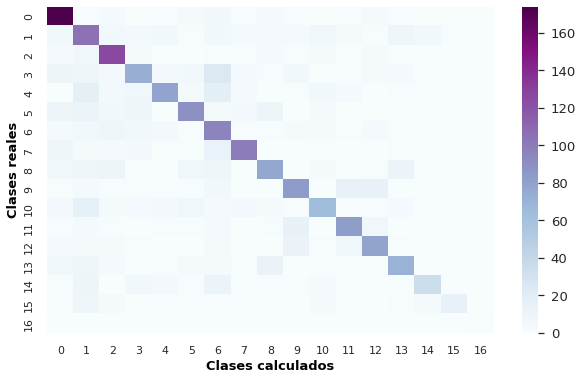

In [ ]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(10,6))

mat = confusion_matrix(test_set["Labels"], y_pred)

r=sns.heatmap(mat, cmap='BuPu', xticklabels=temas, yticklabels=temas)
plt.xlabel('Clases calculados', fontdict=fuente)
plt.ylabel('Clases reales', fontdict=fuente)

plt.xticks(fontsize=11, family='sans-serif')
plt.yticks(fontsize=11, family='sans-serif')

r.set_title('')

**Guardar y cargar el modelo para uso futuro**

In [ ]:
model.save("/models/text_classifier_v1")

In [ ]:
from tensorflow import keras

# load model
#new_model = keras.models.load_model("/models/text_classifier_v1")

#ejemplo= "ALGUNAS CONSIDERACIONES ACERCA DE LOS ABSCESOS"
# test predictions
#[np.argmax(pred) for pred in new_model.predict(ejemplo)]
# output: [3, 1, 0]

**Dividir corpus en clases generales**

In [ ]:
corpus_clases=pd.read_csv('/content/drive/MyDrive/Clasificación histórica-temática/BERT and TensorFlow/Resultados/Clase_General_Corpus.csv', encoding='latin8') 

<ipython-input-3-cdc3b84e0a5f>:1: DtypeWarning: Columns (14,16,29) have mixed types. Specify dtype option on import or set low_memory=False.
  corpus_clases=pd.read_csv('/content/drive/MyDrive/Clasificación histórica-temática/BERT and TensorFlow/Resultados/Clase_General_Corpus.csv', encoding='latin8')


In [ ]:
corpus_clases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31701 entries, 0 to 31700
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0.1             31701 non-null  int64 
 1   Unnamed: 0               31701 non-null  int64 
 2   CLAVE                    31701 non-null  int64 
 3   CLAVE-ACM                31650 non-null  object
 4   CLAVE-ACM_Modificada     31701 non-null  object
 5   REVISTA                  31701 non-null  object
 6   TITULO                   31701 non-null  object
 7   PALABRAS-CLAVE-ANTES     31701 non-null  object
 8   Autores                  31681 non-null  object
 9   ADSCRIPCION              31678 non-null  object
 10  TITULO ABREVIADO         31701 non-null  object
 11  REV-ISO                  30610 non-null  object
 12  ISSN                     31701 non-null  object
 13  AÑO                      31701 non-null  int64 
 14  VOL                      31701 non-nul

In [ ]:
#'Astronomía', 'Mineralogía', 'Meteorología', 'Anatomía Humana', 'Bacteriología', 'Antropología', 
#'Fisiología', 'Medicina', 'Geografía', 'Mecánica', 'Botánica', 'Física', 'Matemática', 'Geología', 
#'Biología General', 'Zoología', 'Antropología Humana'

Clase='Antropología Humana'

ruta='/content/drive/MyDrive/Clasificación histórica-temática/BERT and TensorFlow/Resultados/'

filtro_Clase=corpus_clases[corpus_clases['ClaseTemáticaGeneral-RS']== Clase]
filtro_Clase.to_csv(ruta + Clase + ".csv",  encoding='latin8')

**OneVsRestClassifier**

In [ ]:
import pandas as pd 
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.multiclass import OneVsOneClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importar los datos de entrenamiento**

In [ ]:
#'Astronomía', 'Mineralogía', 'Meteorología', 'Anatomía Humana', 'Bacteriología', 'Antropología', 
#'Fisiología', 'Medicina', 'Geografía', 'Mecánica', 'Botánica', 'Física', 'Matemática', 'Geología', 
#'Biología General', 'Zoología', 'Antropología Humana'

df=pd.read_csv('/content/drive/MyDrive/Clasificación histórica-temática/OneVsRestClassifier/Datos de entrenamiento/DatosEntremaientoOneVsRestClassifierA.csv', encoding="Latin8")

In [ ]:
df.head(3)

,TITULO,CLASES
0,EVIDENCES OF THE ANTIQUITY OF MAN OF THE SITE ...,"[Antropología, Antropología de la Prehistoria ..."
1,BEHAVIORAL-ANALYSIS AND STRUCTURE OF A PREHIST...,"[Antropología, Antropología de la Prehistoria ..."
2,LAS COMUNIDADES INDIGENAS,"[Antropología, Antropología etnológica, Descr..."


**Dividir datos de entrenamiento**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['TITULO'], df['CLASES'], test_size=0.2, random_state=42)

**Vectorizar**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

**Importar y entrenar el modelo OneVsRestClassifier**

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

clf = OneVsRestClassifier(SVC(kernel='linear'))
clf.fit(X_train_tfidf, y_train)

OneVsRestClassifier(estimator=SVC(kernel='linear'))

**Evaluar el modelo**

In [ ]:
y_pred = clf.predict(X_test_tfidf)

In [ ]:
from sklearn import metrics

from sklearn.metrics import precision_score
 
# Calcular precisión macro
precision_macro = precision_score(y_test, y_pred, average='macro')
print(f'Precisión macro: {precision_macro}')

Precisión macro: 0.015873015873015872


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
precision_weighted = precision_score(y_test, y_pred, average='weighted')
print(f'Precisión weighted: {precision_weighted}')

Precisión weighted: 0.2694620873519956


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Calcular precisión micro
precision_micro = precision_score(y_test, y_pred, average='micro')
print(f'Precisión micro: {precision_micro}')

Precisión micro: 0.3577981651376147


**Predicciones**

In [ ]:
nuevo_texto = ['EL TRINAGULO EQUILATERO']
nuevo_texto_tfidf = tfidf.transform(nuevo_texto)
predicciones = clf.predict(nuevo_texto_tfidf)

In [ ]:
predicciones

array(['[Astronomía, Cometas, Generalidades, Aspecto físico]'],
      dtype='<U137')

In [ ]:
#'Astronomía', 'Mineralogía', 'Meteorología', 'Anatomía Humana', 'Bacteriología', 'Antropología', 
#'Fisiología', 'Medicina', 'Geografía', 'Mecánica', 'Botánica', 'Física', 'Matemática', 'Geología', 
#'Biología General', 'Zoología', 'Antropología Humana'
pd_nombre = 'Antropología Humana'


Predict_df=pd.read_csv('/content/drive/MyDrive/Clasificación histórica-temática/BERT and TensorFlow/Resultados/' + pd_nombre + '.csv', encoding='Latin8')

In [ ]:
for columna in df.columns:
        #if columna != 'columna_a_clasificar' and columna != 'columna_de_etiquetas':
            #nuevo_texto = Predict_df['TITULO'].tolist()
            nuevo_texto_tfidf = tfidf.transform(Predict_df['TITULO'])
            predicciones = clf.predict(nuevo_texto_tfidf)
            Predict_df[columna + '_prediccion'] = predicciones

In [ ]:
Predict_df = Predict_df.drop(columns=["Unnamed: 0.2", "Unnamed: 0", "Unnamed: 0.1", "TITULO_prediccion"])

In [ ]:
Predict_df.head(3)

,CLAVE,CLAVE-ACM,CLAVE-ACM_Modificada,REVISTA,TITULO,PALABRAS-CLAVE-ANTES,Autores,ADSCRIPCION,TITULO ABREVIADO,REV-ISO,...,PROCEDENCIA,INSTITUCION,RESUMEN,COBERTURA,VISIBILIDAD,NOTAS,Idioma,Themes,ClaseTemáticaGeneral-RS,CLASES_prediccion
0,26788,ACM:0002-9173.65.450,AHCM:0002-9173.65.450,AMERICAN JOURNAL OF CLINICAL PATHOLOGY,GERM-CELL TUMORS OF MEDIASTINUM POSTMORTEM FIN...,GERM-CELL; TUMORS; MEDIASTINUM; POSTMORTEM,"VALENZUELA-TAMARIZ, J; LUNA, MA",LOC,AM J CLIN PATHOL,Am. J. Clin. Pathol.,...,EXT,"UNIV TEXAS MD ANDERSON HOSP,CTR CANC,DEPT PATH...",V,SCI,CP,NaN,Inglés,NaN,Antropología Humana,"[Antropología Humana, Citología e Histología, ..."
1,26789,ACM:0002-9297.28.190,AHCM:0002-9297.28.190,AMERICAN JOURNAL OF HUMAN GENETICS,HETEROGENIC MONOZYGOCITY EVIDENCE FOR TRANSMIS...,HETEROGENIC MONOZYGOCITY EVIDENCE; TRANSMISSIO...,"CANTU, JM",LOC,AM J HUM GENET,Am. J. Hum. Genet.,...,EXT,"UNIDAD INVEST MED EXPTL,APARTADO POSTAL 73-032...",V,SCI,CP,NaN,Inglés,NaN,Antropología Humana,"[Antropología Humana, Desarrollo en general, ..."


In [ ]:
Predict_df.to_csv('/content/drive/MyDrive/Clasificación histórica-temática/OneVsRestClassifier/Resultados/' + pd_nombre + '.csv', encoding='utf-8')